In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve,auc)

In [3]:
from google.colab import files
data=files.upload()

Saving data_file.csv.zip to data_file.csv (15).zip


In [4]:
df=pd.read_csv("data_file.csv.zip")
print("dataset loaded successfully!")
print(df.head())

dataset loaded successfully!
                                            FileName  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll   
1       05c8318f98a5d301d80000009c316005.vertdll.dll   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll   
3        075822ac99a5d301660400009c316005.adhapi.dll   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...   

                            md5Hash  Machine  DebugSize  DebugRVA  \
0  79755c51e413ed3c6be4635fd729a6e1      332          0         0   
1  95e19f3657d34a432eada93221b0ea16    34404         84    121728   
2  85c32641d77a54e19ba8ea4ab305c791      332          0         0   
3  62e3b959d982ef534b66f819fe15f085    34404         84     19904   
4  ae38c5f7d313ad0ff3bfb8826476767f    34404         84     97728   

   MajorImageVersion  MajorOSVersion  ExportRVA  ExportSize  IatVRA  \
0                  0               4          0           0    8192   
1                 10              10     126576        4930       0   
2     

In [5]:
x=df.drop("DebugSize",axis=1)
y=df["DebugSize"]

In [6]:
from pandas.core.arrays import categorical
numeric_cols=x.select_dtypes(include=['int64','float64']).columns
categorical_cols=x.select_dtypes(include=['object']).columns

In [7]:
from sklearn import preprocessing
preprocessing=ColumnTransformer(transformers=[("num","passthrough",numeric_cols)])

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

model = Pipeline([
    ("preprocess", preprocessing),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split # Make sure train_test_split is imported

df=pd.read_csv("data_file.csv.zip")
print("dataset loaded successfully!")
print(df.head())

# Define x and y (moved from lOImoOSqXNQn)
x=df.drop("DebugSize",axis=1)
y=df["DebugSize"]

# Redefine numeric_cols and categorical_cols
numeric_cols=x.select_dtypes(include=['int64','float64']).columns
categorical_cols=x.select_dtypes(include=['object']).columns

# Redefine preprocessing
preprocessing=ColumnTransformer(transformers=[("num","passthrough",numeric_cols)])

model = Pipeline([
    ("preprocess", preprocessing),
    ("classifier", RandomForestClassifier(n_estimators=50, random_state=42)) # Reduced n_estimators
])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model.fit(x_train,y_train)
print("\nmodel training completed!")

dataset loaded successfully!
                                            FileName  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll   
1       05c8318f98a5d301d80000009c316005.vertdll.dll   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll   
3        075822ac99a5d301660400009c316005.adhapi.dll   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...   

                            md5Hash  Machine  DebugSize  DebugRVA  \
0  79755c51e413ed3c6be4635fd729a6e1      332          0         0   
1  95e19f3657d34a432eada93221b0ea16    34404         84    121728   
2  85c32641d77a54e19ba8ea4ab305c791      332          0         0   
3  62e3b959d982ef534b66f819fe15f085    34404         84     19904   
4  ae38c5f7d313ad0ff3bfb8826476767f    34404         84     97728   

   MajorImageVersion  MajorOSVersion  ExportRVA  ExportSize  IatVRA  \
0                  0               4          0           0    8192   
1                 10              10     126576        4930       0   
2     

In [12]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

In [27]:
from os import read
from sklearn.metrics import roc_auc_score
import numpy as np # Import numpy

# Get the classes from the trained RandomForestClassifier within the pipeline
model_classes = model.named_steps['classifier'].classes_

# Filter y_test and y_prob to include only labels present in model_classes
# Create a boolean mask for labels in y_test that are present in model_classes
mask = y_test.isin(model_classes)
y_test_filtered = y_test[mask]
y_prob_filtered = y_prob[mask]

# If after filtering, there's only one class left in y_test_filtered, ROC AUC is not meaningful
if len(np.unique(y_test_filtered)) < 2:
    roc_auc_val = "Not applicable (less than 2 classes in filtered y_test)"
else:
    roc_auc_val = roc_auc_score(y_test_filtered, y_prob_filtered, multi_class='ovr', average='weighted', labels=model_classes)

print("\n==========MODEL PERFORMANCE==========")
print("ACCURACY :",accuracy_score(y_test,y_pred))
print("PRECISION :",precision_score(y_test,y_pred, average='weighted'))
print("RECALL :",recall_score(y_test, y_pred, average='weighted'))
print("ROC-AUC :", roc_auc_val)
print("=========================================")


==========MODEL PERFORMANCE==========
ACCURACY : 0.9866367928302793
PRECISION : 0.9861971594992931
RECALL : 0.9866367928302793
ROC-AUC : 0.9995092405422614


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
class_names = model_classes # Use the already available model_classes from kernel state
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names) # Fix: Separate class_names assignment, use class_names for yticklabels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# The following lines for ROC curve and histogram are commented out
# as variables like fpr, tpr, roc_auc are not defined and y_prob is 2D.
# For multiclass classification, ROC curve plotting often requires plotting
# one-vs-rest for each class or micro/macro averages, and probability histograms
# may need specific handling of the 2D y_prob array (e.g., plotting confidence of prediction).

# plt.figure(figsize=(6,5))
# # This part requires fpr, tpr, roc_auc to be defined.
# # plt.plot(fpr,tpr,label=f"ROC Curve(AUV={roc_auc:;2f})")
# # plt.plot([0,1],[0,1],linestyle="--", color="gray") # Fix: Missing comma
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(6,4))
# # This part expects a 1D array for y_prob. If y_prob is 2D, it will require reshaping or selecting a specific column.
# # plt.hist(y_prob,bins=20,edgecolor="black")
# plt.title("Malware Probability Distribution")
# plt.xlabel("Malware Probability")
# plt.ylabel("Count")
# plt.tight_layout()
# plt.show()

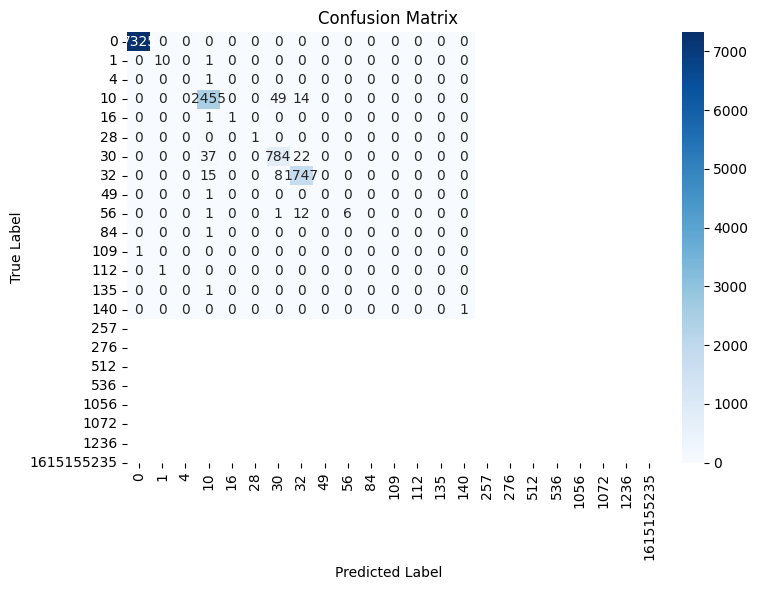

In [26]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
class_names = model_classes # Use the already available model_classes from kernel state
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names) # Fix: Separate class_names assignment, use class_names for yticklabels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# The following lines for ROC curve and histogram are commented out
# as variables like fpr, tpr, roc_auc are not defined and y_prob is 2D.
# For multiclass classification, ROC curve plotting often requires plotting
# one-vs-rest for each class or micro/macro averages, and probability histograms
# may need specific handling of the 2D y_prob array (e.g., plotting confidence of prediction).

# plt.figure(figsize=(6,5))
# # This part requires fpr, tpr, roc_auc to be defined.
# # plt.plot(fpr,tpr,label=f"ROC Curve(AUV={roc_auc:;2f})")
# # plt.plot([0,1],[0,1],linestyle="--", color="gray") # Fix: Missing comma
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.tight_layout()
# plt.show()

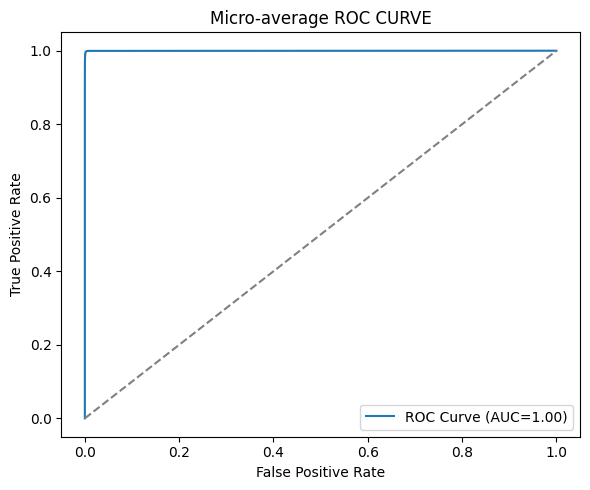

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported for conditional check

# Assuming y_test_filtered, y_prob_filtered, model_classes, and roc_auc_val are available from previous cell.

# Handle case where ROC AUC was not applicable (e.g., less than 2 classes in filtered y_test)
if not isinstance(roc_auc_val, (float, np.floating)):
    print(f"ROC Curve cannot be plotted: {roc_auc_val}")
else:
    # Binarize the true labels for multi-class ROC calculation
    lb = LabelBinarizer()
    lb.fit(model_classes) # Fit on all possible classes the model knows
    y_test_binarized = lb.transform(y_test_filtered)

    # Compute micro-average ROC curve and ROC area
    # Flatten the binarized true labels and probability scores for micro-average
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_prob_filtered.ravel())
    roc_auc = auc(fpr, tpr) # This will be the micro-average AUC

    plt.figure(figsize=(6,5))
    plt.plot(fpr,tpr,label=f"ROC Curve (AUC={roc_auc:.2f})")
    plt.plot([0,1],[0,1],linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Micro-average ROC CURVE")
    plt.legend()
    plt.tight_layout()
    plt.show()

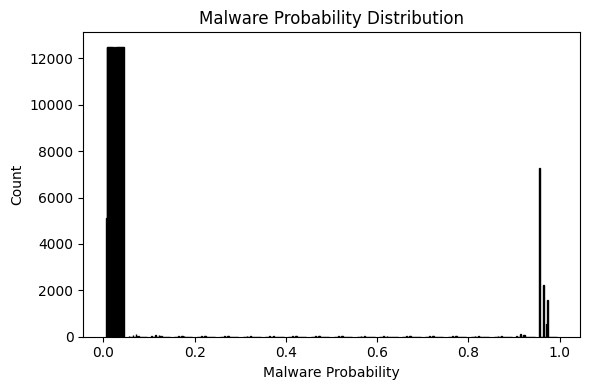

In [30]:
plt.figure(figsize=(6,4))
plt.hist(y_prob,bins=20,edgecolor="black")
plt.title("Malware Probability Distribution")
plt.xlabel("Malware Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

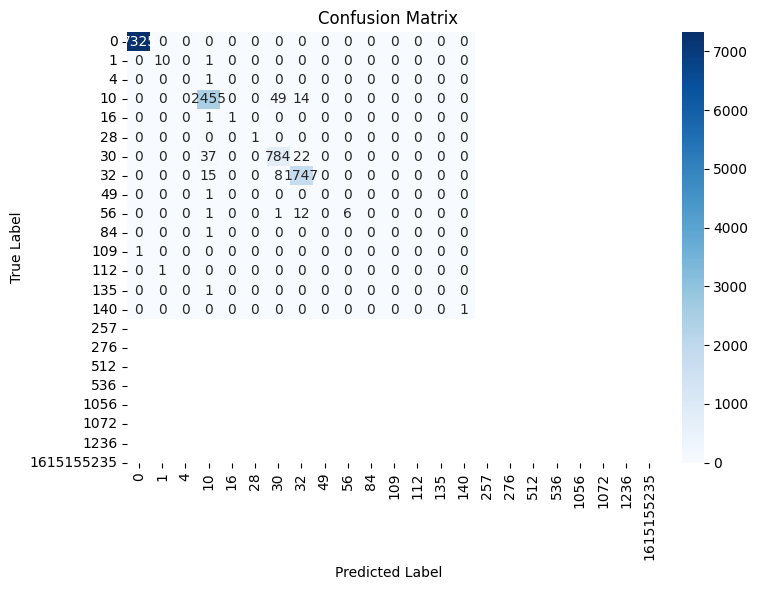

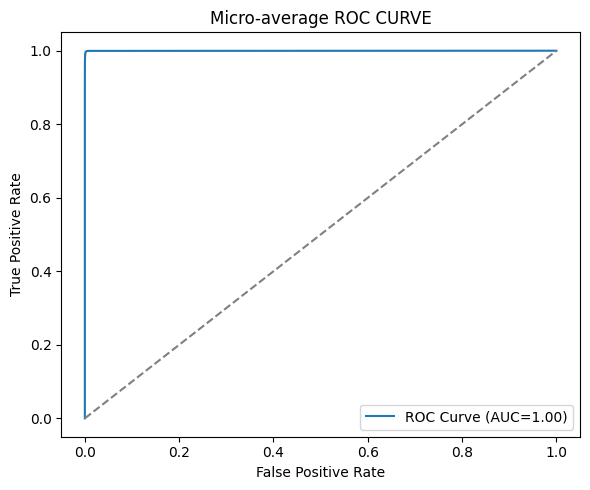

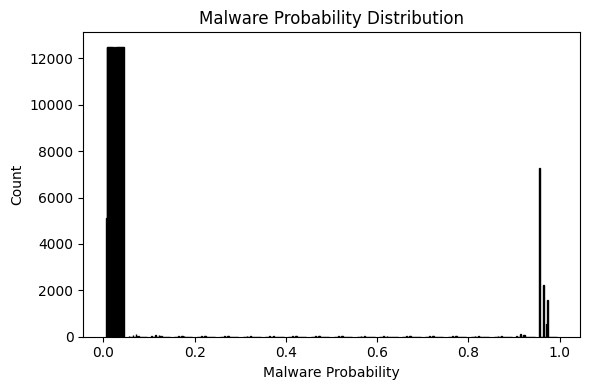

In [44]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8, 6)) # Increased overall figure size for clarity
class_names = model_classes # Use the already available model_classes from kernel state
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()


# ROC curve and Probability Distribution plots remain below as previously defined
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported for conditional check

if not isinstance(roc_auc_val, (float, np.floating)):
    print(f"ROC Curve cannot be plotted: {roc_auc_val}")
else:
    lb = LabelBinarizer()
    lb.fit(model_classes)
    y_test_binarized = lb.transform(y_test_filtered)

    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_prob_filtered.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr,tpr,label=f"ROC Curve (AUC={roc_auc:.2f})")
    plt.plot([0,1],[0,1],linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Micro-average ROC CURVE")
    plt.legend()
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(6,4))
plt.hist(y_prob,bins=20,edgecolor="black")
plt.title("Malware Probability Distribution")
plt.xlabel("Malware Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [38]:
sample=pd.DataFrame([
    {
        'FileName': 'test_file.dll',
        'md5Hash': 'dummyhash1234567890abcdef1234567890',
        'Machine': 332,
        'DebugRVA': 0,
        'MajorImageVersion': 0,
        'MajorOSVersion': 4,
        'ExportRVA': 0,
        'ExportSize': 0,
        'IatVRA': 8192,
        'MajorLinkerVersion': 8,
        'MinorLinkerVersion': 0,
        'NumberOfSections': 3,
        'SizeOfStackReserve': 1048576,
        'DllCharacteristics': 34112,
        'ResourceSize': 672,
        'BitcoinAddresses': 0,
        'Benign': 1
    }
])
pred=model.predict(sample)[0]
prob_index = np.where(model.named_steps['classifier'].classes_ == pred)[0][0]
prob=model.predict_proba(sample)[0][prob_index]
print("\n===SAMPLE PREDICTION===")
print("PREDICTION :",pred)
print("PROBABILITY :",prob)


===SAMPLE PREDICTION===
PREDICTION : 0
PROBABILITY : 1.0
